In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install pytorch-lightning
!pip install segmentation-models-pytorch
!pip install rich
!pip install hydra-core

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 708 kB 29.9 MB/s 
     |████████████████████████████████| 529 kB 67.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 6.5 MB/s 
     |████████████████████████████████| 58 kB 7.3 MB/s 
     |████████████████████████████████| 376 kB 62.8 MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=56d57239c06787de32aab5ef3e08d9dbc47fa6fe52d4c6caaba8de62cbf46245
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=2f593d3da59ecf302859f9f63f32f4f7bdf12897f8a9d30b57e49fbc5916d169
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d

In [3]:
import pytorch_lightning as pl
import pandas as pd
import cv2
import os 
import torchvision
from torch import nn
from torch.utils.data import Dataset ,DataLoader, random_split
import numpy as np
import torch
from sklearn.model_selection import train_test_split 
from torchvision import transforms, datasets, models
import matplotlib.pyplot as plt
import torchmetrics
from torchmetrics.functional import accuracy
from pytorch_lightning.callbacks import LearningRateMonitor
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.loggers import CSVLogger
from torchvision.utils import make_grid
import math
import torch.nn.functional as F
from torchvision.ops import box_convert
from PIL import Image
from pycocotools.coco import COCO
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import random
import matplotlib.image as mpimg
from imutils import paths
import segmentation_models_pytorch as smp
import sys
import operator

In [4]:
cfg = {
    "Insert Paths": {
        "Path1" : "/content/drive/MyDrive/Github_Repos/historia_ml_handwritten_text_line_segmentation",
        "Path2" : "/content/drive/MyDrive/Github_Repos/historia_ml_handwritten_text_line_segmentation/src/utils"
    },

    "page_img_path": "/content/drive/MyDrive/Datasets/mask-image/original/8.png",
    "window_size": 320,
    "page_folder_path": "/content/drive/MyDrive/Datasets/berat_kurar_test_images/page8",
    "patch_name" : "page7",
    "page_pred_name": "/content/drive/MyDrive/output/test_page_predicted_masks/page8_predicted_mask_from_320x320_patches.png"

}

In [5]:
sys.path.insert(0, cfg["Insert Paths"]["Path1"])
sys.path.insert(0, cfg["Insert Paths"]["Path2"])

In [6]:
import src
from src.custom_segmentation_dataset import SegmentationDataset
from src.config import cfg, transform
import src.utils as utils
from src.datamodules.segmentation_datamodule import LitDataModule
from src.models.unet_module import LitModel
from src.utils.make_prediction import make_predictions
from src.utils.concatenate_patches_to_image import from_patches_to_image
from src.utils.resize_image_according_to_window_size import resize_to_multiple_of_window_scale
from src.utils.display_image_from_array import img_show_from_arr
from src.utils.display_image_from_path import img_show
from src.utils.create_patches_with_path import create_patches
from src.utils.create_images import create_img_folder
from src.utils.get_patch_num import get_patch_num_from_name
from src.utils.get_patch_path import get_img_patch_paths
from src.utils.make_prediction_with_high_resolution_images import make_prediction_with_high_resolution_test_imgs
from src.utils.sort_prediction_patches import sort_predicted_patch_masks

In [7]:
dm = LitDataModule()
model = LitModel()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [8]:
model = torch.load(cfg["base_output"] + "/pyimagesearch_example_lightning_testLoss_0_099.pth").to(cfg["device"])
#model = torch.load(cfg["base_output"] + "/pyimagesearch_example_lightning_testLoss0_25.pth").to(cfg["device"])

293


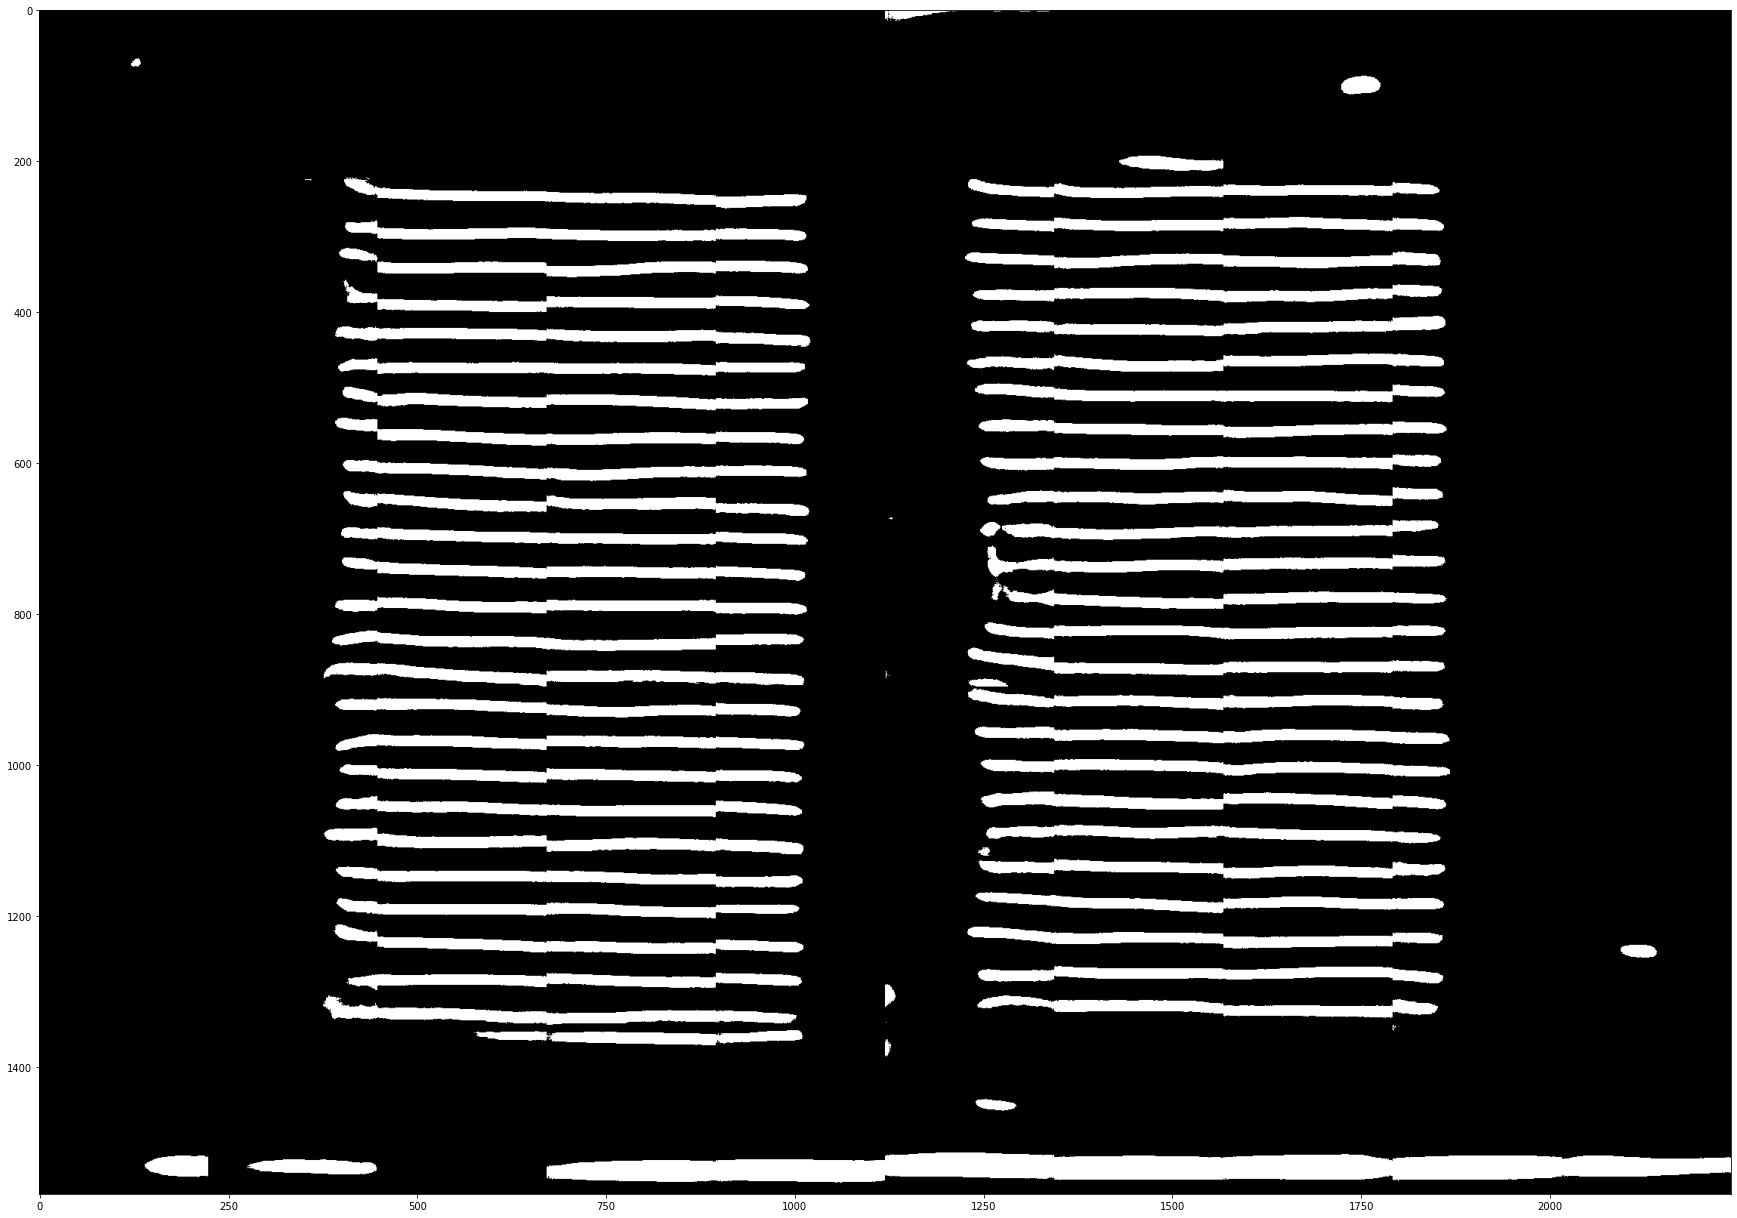

In [ ]:
page_img_path = "/content/drive/MyDrive/Images/ESADEFENDI/3.png"
filename = page_img_path.split("/")[-1].split(".")[0]
img = cv2.imread(page_img_path)
h, w, d = img.shape
window_size = w // 10
print(window_size)
page_folder_path = f"/content/{filename}-{window_size}"
patch_name = f"{filename}-{window_size}"
model = model

page_pred_mask = make_prediction_with_high_resolution_test_imgs(page_img_path,
                                                                 window_size,
                                                                 page_folder_path,
                                                                 patch_name,
                                                                 model
                                                                 )
img_show_from_arr(page_pred_mask)
#page_pred_name = f"{filename}_mask_{window_size}x{window_size}.png"
page_pred_name = f"{filename}.png"

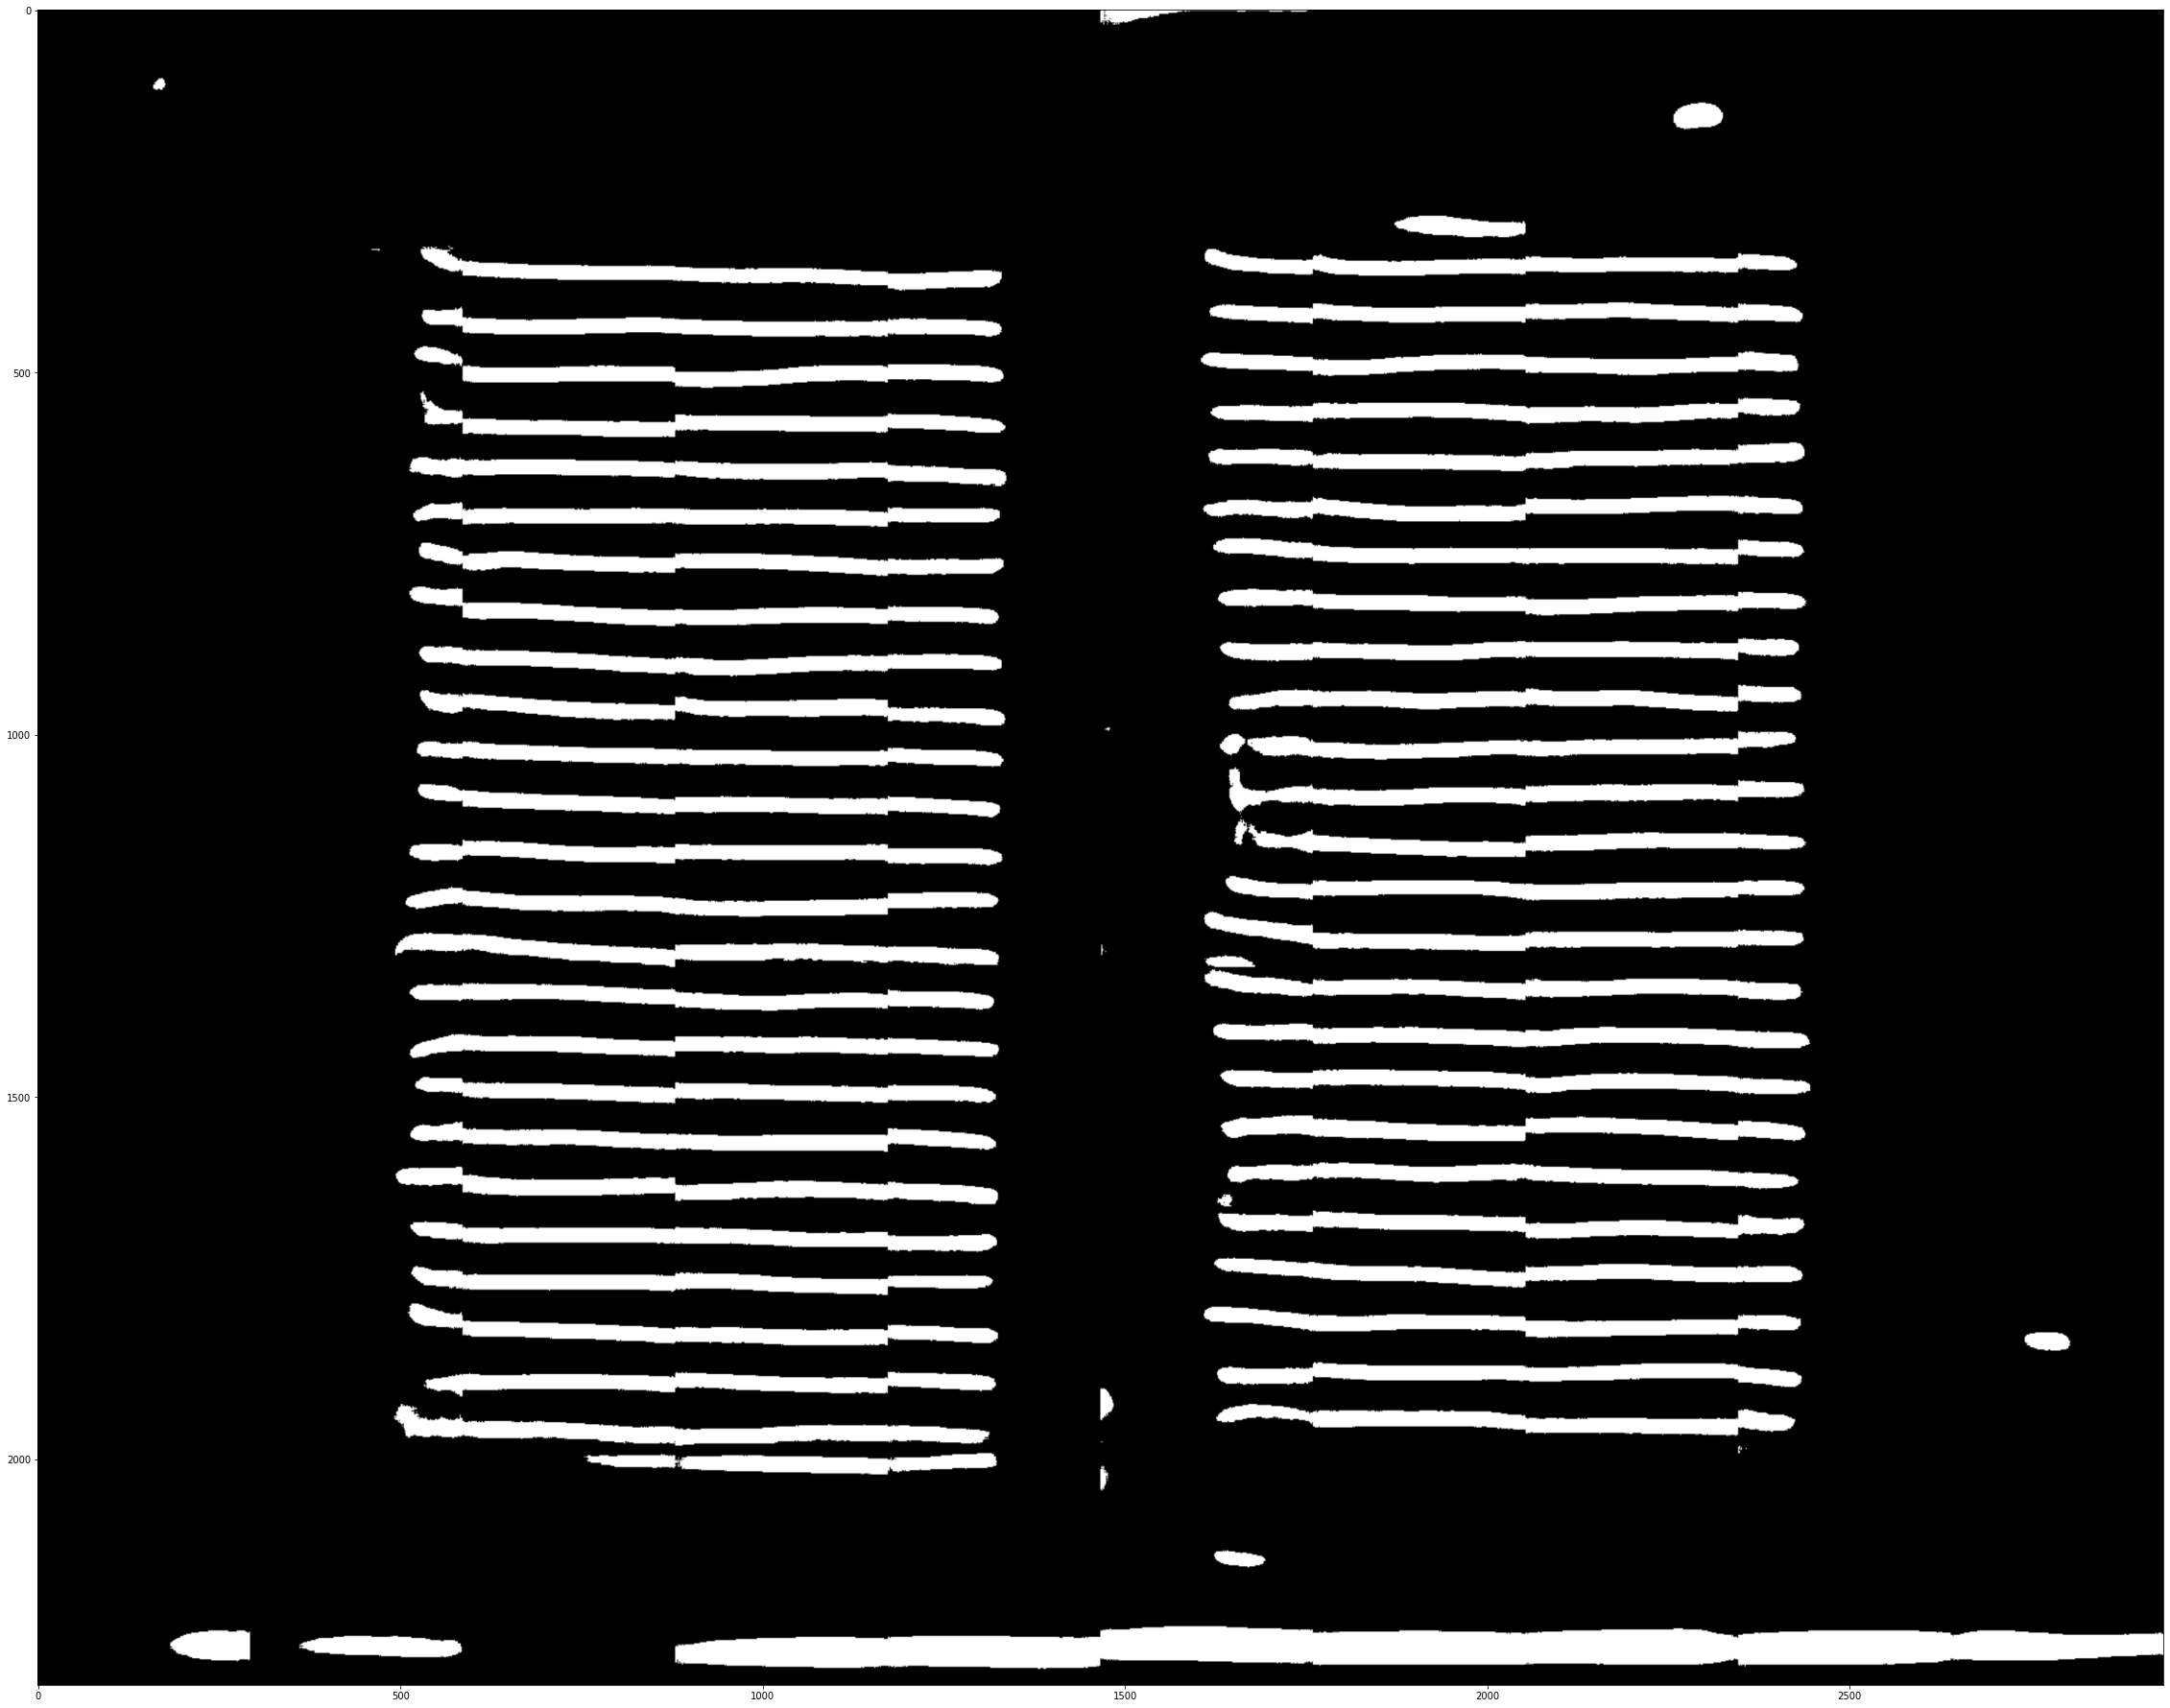

(2933, 2312)


In [ ]:
page_pred_mask_resized = cv2.resize(page_pred_mask, (w, h))
img_show_from_arr(page_pred_mask_resized)
cv2.imwrite("/content/drive/MyDrive/image masks/ESADEFENDI/" + page_pred_name, page_pred_mask_resized)
print((w,h))

In [9]:
images = os.listdir("/content/drive/MyDrive/Line Extraction/Images/evliya_celebi_2v2")
images[:10]

['image0-0.png',
 'image1-0.png',
 'image2-0.png',
 'image4-0.png',
 'image5-0.png',
 'image6-0.png',
 'image7-0.png',
 'image8-0.png',
 'image9-0.png',
 'image10-0.png']

In [10]:
for img in images[:10]:
  print(img)

image0-0.png
image1-0.png
image2-0.png
image4-0.png
image5-0.png
image6-0.png
image7-0.png
image8-0.png
image9-0.png
image10-0.png


In [11]:
images_parent_path = "/content/drive/MyDrive/Line Extraction/Images/evliya_celebi_2v2"
images_path = []
for img in images:
  images_path.append(images_parent_path+"/"+img)
images_path[:10]

['/content/drive/MyDrive/Line Extraction/Images/evliya_celebi_2v2/image0-0.png',
 '/content/drive/MyDrive/Line Extraction/Images/evliya_celebi_2v2/image1-0.png',
 '/content/drive/MyDrive/Line Extraction/Images/evliya_celebi_2v2/image2-0.png',
 '/content/drive/MyDrive/Line Extraction/Images/evliya_celebi_2v2/image4-0.png',
 '/content/drive/MyDrive/Line Extraction/Images/evliya_celebi_2v2/image5-0.png',
 '/content/drive/MyDrive/Line Extraction/Images/evliya_celebi_2v2/image6-0.png',
 '/content/drive/MyDrive/Line Extraction/Images/evliya_celebi_2v2/image7-0.png',
 '/content/drive/MyDrive/Line Extraction/Images/evliya_celebi_2v2/image8-0.png',
 '/content/drive/MyDrive/Line Extraction/Images/evliya_celebi_2v2/image9-0.png',
 '/content/drive/MyDrive/Line Extraction/Images/evliya_celebi_2v2/image10-0.png']

In [12]:
for path in images_path:
  page_img_path = path
  filename = page_img_path.split("/")[-1].split(".")[0]
  img = cv2.imread(page_img_path)
  h, w, d = img.shape
  window_size = w // 10
  page_folder_path = f"/content/{filename}"
  patch_name = f"{filename}"
  model = model

  page_pred_mask = make_prediction_with_high_resolution_test_imgs(page_img_path,
                                                                  window_size,
                                                                  page_folder_path,
                                                                  patch_name,
                                                                  model
                                                                  )
  page_pred_name = f"{filename}.png"
  page_pred_mask_resized = cv2.resize(page_pred_mask, (w, h))
  cv2.imwrite("/content/drive/MyDrive/Line Extraction/image masks/evliya_celebi_2v2/" + page_pred_name, page_pred_mask_resized)